In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

BASEPATH = '/home/vdesai/data/model_outputs/daytime/'

In [8]:
df = pd.concat([pd.read_csv(os.path.join(BASEPATH, f)).drop(columns = ['Unnamed: 0']) for f in os.listdir(BASEPATH) if f.endswith('.log')], ignore_index= True)


        TimeIndex  TimeInFile  PrecedingIntrvl    HiFreq   Bndwdth  \
0        1.678744    0.051488        -0.164840  0.330963  0.243343   
1        1.678744    0.863058        -0.106458  0.992467  0.752329   
2        1.678744    1.353967        -0.424185 -0.083231 -0.343777   
3        1.678744   -1.099803        -0.298543  0.699116  0.818408   
4        1.678744    1.456561        -0.028969 -0.568485 -0.657796   
...           ...         ...              ...       ...       ...   
873875   1.678744   -0.088198         0.183315  0.239068  0.204901   
873876   1.678744   -0.248419         0.336240  0.106831 -0.076195   
873877   1.678744   -0.641549         0.278934  0.136934 -0.265557   
873878   1.678744   -0.916984         0.185819  0.117289 -0.074819   
873879   1.678744   -1.179360         0.284579  0.321696  0.122187   

        FreqMaxPwr  PrcntMaxAmpDur  FreqKnee  PrcntKneeDur    StartF  ...  \
0         0.237853        0.311555  0.378689      0.124580  0.304158  ...   
1    

In [10]:
#calculate variance of each column in the grouped data frame
variances = df.drop(columns = ['model_id']).groupby(['file_id', 'chirp_idx']).var().reset_index()

In [72]:
import seaborn as sns

def plot_col_variances(df, file_id, colnames):
    # Use seaborn theme for better aesthetics
    sns.set_theme(style="whitegrid")
    
    # Create a color palette
    colors = sns.color_palette("hsv", len(colnames))
    
    fig, ax = plt.subplots(figsize=(10, 6), dpi=300)  # Increase DPI for higher resolution
    
    for i, colname in enumerate(colnames):
        df_slice = df[df.file_id == file_id]
        a = np.array(df_slice[["chirp_idx", colname]])
        
        # Plot the data
        ax.plot(a[:, 0], a[:, 1], marker='o', linestyle='-', color=colors[i], label=colname)
    
    # Add titles and labels with bold font
    ax.set_title(f'Variation of Columns over Chirp Index for file_id {file_id}', fontsize=16, fontweight='bold')
    ax.set_xlabel('Chirp Index', fontsize=14, fontweight='bold')
    ax.set_ylabel('Values', fontsize=14, fontweight='bold')
    
    # Add grid
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Add legend
    #ax.legend(title="Columns", fontsize=12, title_fontsize=14)
    
    # Improve layout
    fig.tight_layout()
    
    return fig, ax

def plot_col_variances_sum(df, file_id, colnames, min = None, max = None):
    # Use seaborn theme for better aesthetics
    sns.set_theme(style="whitegrid")
    
    # Create a color palette
    colors = sns.color_palette("hsv", len(colnames))
    
    fig, ax = plt.subplots(figsize=(10, 6), dpi=300)  # Increase DPI for higher resolution

    df_slice = df[df.file_id == file_id]

    a = np.array(df_slice[["chirp_idx"] + colnames])
    
    ax.plot(a[:, 0], np.sum(a[:, 1:], axis = 1), marker = 'o', linestyle = '-', color = 'r', label = 'sum')
    sums = np.sum(a[:, 1:], axis = 1)
    #get moving average of sums

    #n=3;
    #av = np.convolve(sums, 1/n*np.ones((n), dtype = np.float64))


    #ax.plot(a[:, 0], av[n-1:], marker = 'o', linestyle = '--', color = 'g', label = 'moving average')
    ax.plot(a[:, 0], pd.Series(sums).rolling(window=3).mean(), marker = 'o', linestyle = '--', color = 'g', label = 'moving average')

    #ax.plot(a[:, 0], np.median(a[:, 1:], axis = 1), marker = 'o', linestyle = '-', color = 'r', label = 'median')
 
    
    # Add titles and labels with bold font
    ax.set_title(f'Variation of Columns over Chirp Index for file_id {file_id}', fontsize=16, fontweight='bold')
    ax.set_xlabel('Chirp Index', fontsize=14, fontweight='bold')
    ax.set_ylabel('Values', fontsize=14, fontweight='bold')
    if min is not None:
        ax.set_ylim([min,max])
    # Add grid
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Add legend
    ax.legend(title="Columns", fontsize=12, title_fontsize=14)
    
    # Improve layout
    fig.tight_layout()
    
    return fig, ax

In [73]:


cols = list(variances.columns)
cols.remove('file_id')
cols.remove('chirp_idx')

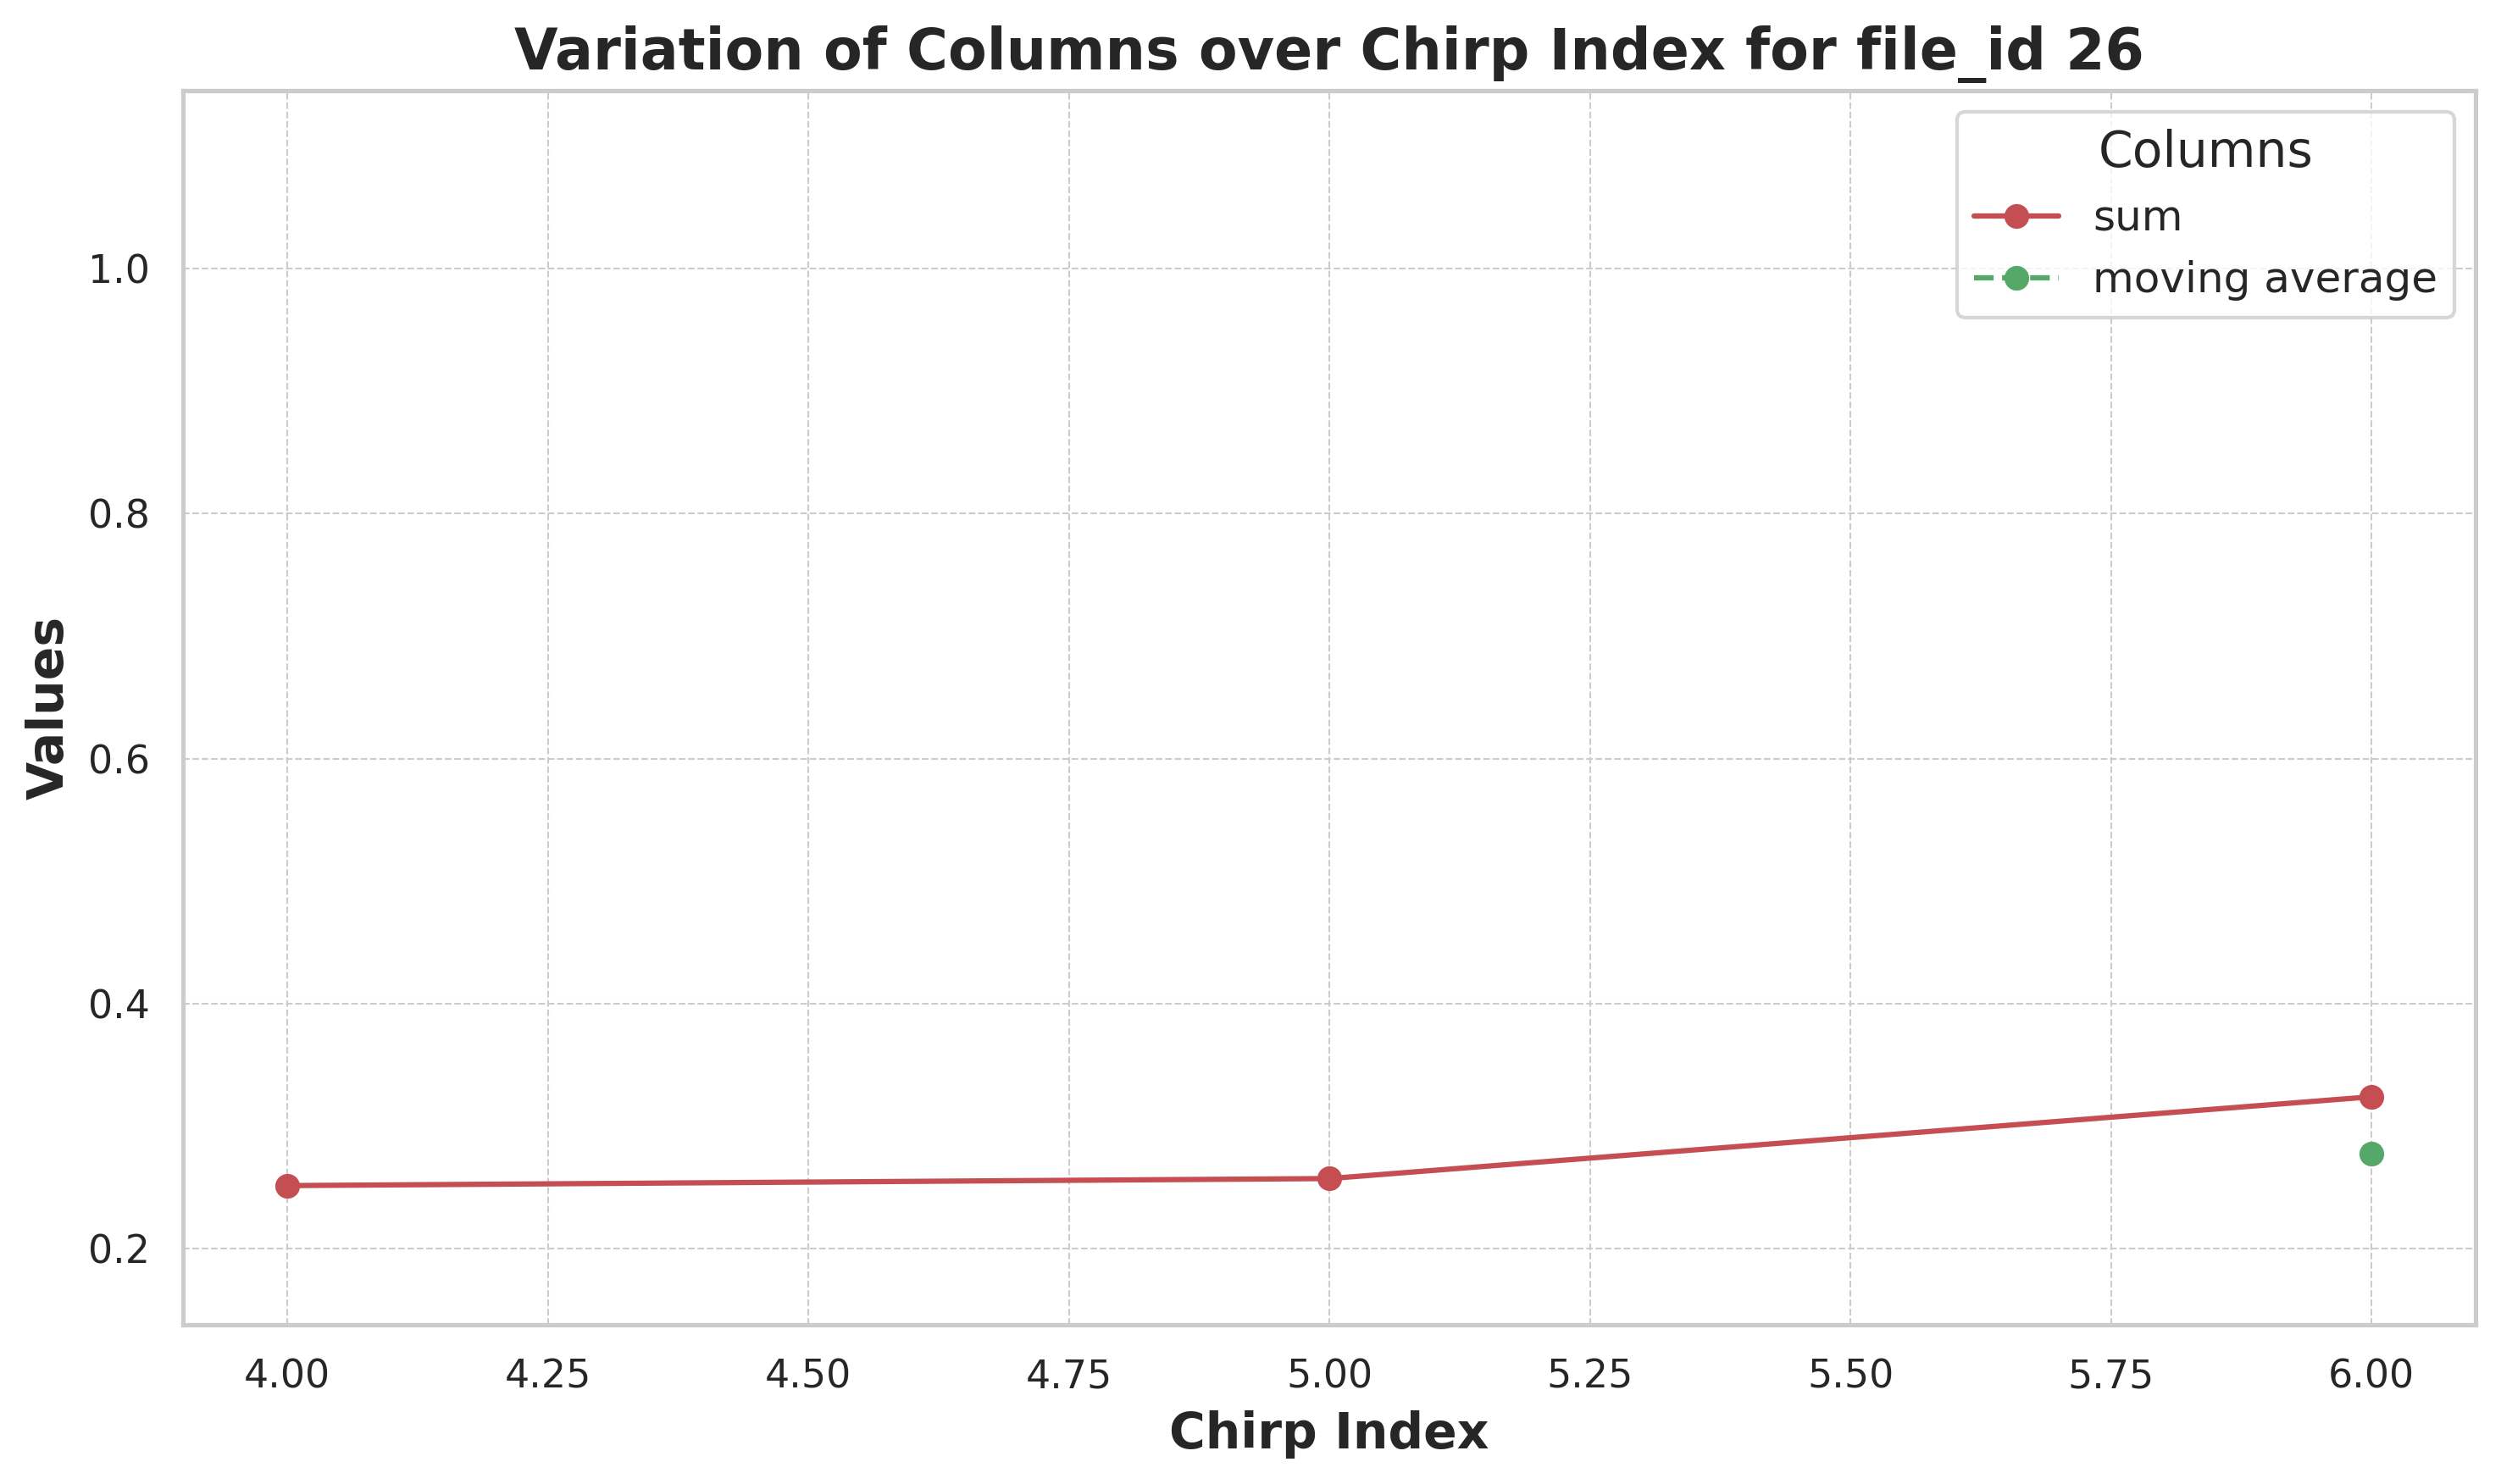

In [74]:
sums = np.sum(np.array(variances[cols]), axis = 1).reshape(-1)
min, max = np.percentile(sums, 0.05), np.percentile(sums, 99.9)

fig, ax = plot_col_variances_sum(variances, 26, colnames=cols, min = min, max = max)

In [49]:
max_chirp_idx = variances.groupby('file_id').chirp_idx.max()
valid_file_id = max_chirp_idx[max_chirp_idx > 13].index

In [50]:
import tqdm

valid_file_id = list(valid_file_id)
for file_id in tqdm.tqdm(valid_file_id):
    fig, ax = plot_col_variances_sum(variances, file_id, cols)
    fig.savefig(f'/home/vdesai/plots/daytime/{file_id}.png', dpi=300)
    plt.close(fig)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 853/853 [07:50<00:00,  1.81it/s]


In [70]:
sums = np.sum(np.array(variances[cols]), axis = 1).reshape(-1)
min, max = np.percentile(sums, 0.05), np.percentile(sums, 99.9)

In [71]:
min, max

(0.13812916043315288, 1.1452616771327033)